## Importing libraries

In [4]:
# pip install seaborn

In [5]:
# pip install openpyxl

## 1. Load Data

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [7]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.20.3', '1.3.4', '0.11.2', '3.4.3')

In [8]:
import pandas as pd
df = pd.read_csv('Cars.csv')
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
# Check the shape of my data
df.shape

(8128, 13)

In [10]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [11]:
# Check Dtypes of my input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [12]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [13]:
df_copy = df.copy() # Save dataframe

In [14]:
#Name cut to appear only car brand name
df_copy['Car_Name'] = df_copy['name'].str.split(" ").str[0]
df_copy.drop(['name'], axis=1, inplace=True)
df_copy.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Car_Name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [15]:
df_copy.drop(['torque'], axis = 1, inplace = True)
df_copy.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_Name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,Maruti


In [16]:
#Split value and unit of mileage, engine and max power
df_copy[["Mileage_Value","Mileage_Unit"]] = df_copy["mileage"].str.split(pat=' ', expand = True)
df_copy[["Engine_Value","Engine_Unit"]] = df_copy["engine"].str.split(pat=' ', expand = True)
df_copy[["Max_Power_Value","Max_Power_Unit"]] = df_copy["max_power"].str.split(pat=' ', expand = True)
df_copy.drop(["mileage","engine","max_power"], axis=1, inplace=True)
df_copy.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Car_Name,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,23.4,kmpl,1248,CC,74,bhp
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,21.14,kmpl,1498,CC,103.52,bhp
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17.7,kmpl,1497,CC,78,bhp
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,23.0,kmpl,1396,CC,90,bhp
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16.1,kmpl,1298,CC,88.2,bhp


In [17]:
#Re Arrange column
new_order = [
    'Car_Name', 'year', 'selling_price', 'km_driven', 'fuel', 
    'seller_type', 'transmission', 'owner', 'seats',
    'Mileage_Value', 'Mileage_Unit', 'Engine_Value', 'Engine_Unit',
    'Max_Power_Value', 'Max_Power_Unit'
]
new_df = df_copy[new_order]
new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.4,kmpl,1248,CC,74,bhp
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.7,kmpl,1497,CC,78,bhp
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.0,kmpl,1396,CC,90,bhp
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.1,kmpl,1298,CC,88.2,bhp


In [18]:
#Remove car fuel CNG and LPG to remove a car which use different mileage system
new_df = new_df[new_df['fuel'].isin(['Diesel', 'Petrol'])]
new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.4,kmpl,1248,CC,74,bhp
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.7,kmpl,1497,CC,78,bhp
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.0,kmpl,1396,CC,90,bhp
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.1,kmpl,1298,CC,88.2,bhp


In [19]:
# convert values of mileage into float
new_df['mileage'] = df['mileage'].str.split().str[0].astype(float)

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.4,kmpl,1248,CC,74,bhp,23.40
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp,21.14
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.7,kmpl,1497,CC,78,bhp,17.70
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.0,kmpl,1396,CC,90,bhp,23.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.1,kmpl,1298,CC,88.2,bhp,16.10


In [20]:
# convert values of mileage into float
new_df['Mileage_Value'] = df['mileage'].str.split().str[0].astype(float)

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248,CC,74,bhp,23.40
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp,21.14
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497,CC,78,bhp,17.70
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396,CC,90,bhp,23.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298,CC,88.2,bhp,16.10


In [21]:
# convert values of engine into float
new_df['engine'] = df['engine'].str.split().str[0].astype('float64')

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage,engine
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248,CC,74,bhp,23.40,1248.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp,21.14,1498.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497,CC,78,bhp,17.70,1497.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396,CC,90,bhp,23.00,1396.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298,CC,88.2,bhp,16.10,1298.0


In [22]:
# convert values of engine into float
new_df['Engine_Value'] = df['engine'].str.split().str[0].astype('float64')

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage,engine
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248.0,CC,74,bhp,23.40,1248.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498.0,CC,103.52,bhp,21.14,1498.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497.0,CC,78,bhp,17.70,1497.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396.0,CC,90,bhp,23.00,1396.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298.0,CC,88.2,bhp,16.10,1298.0


In [23]:
# convert values of engine into float
new_df['Max_Power_Value'] = new_df['Max_Power_Value'].str.split().str[0].astype('float64')

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage,engine
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248.0,CC,74.00,bhp,23.40,1248.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498.0,CC,103.52,bhp,21.14,1498.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497.0,CC,78.00,bhp,17.70,1497.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396.0,CC,90.00,bhp,23.00,1396.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298.0,CC,88.20,bhp,16.10,1298.0


In [24]:
# Arrange the columns
new_df = new_df.reindex(columns = ['Car_Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner', 'seats', 'Mileage_Value', 'Engine_Value', 'Max_Power_Value'])

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1248.0,74.00
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498.0,103.52
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1497.0,78.00
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1396.0,90.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1298.0,88.20


In [25]:
# Mapping owner feature into ordinal numbers
dict_owner = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4,
            'Test Drive Car':5}
new_df["owner"] = new_df["owner"].map(dict_owner)
#Remove Test Drive Car
new_df = new_df[new_df['owner'] != 'Test Drive Cars']
new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,5.0,23.40,1248.0,74.00
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,5.0,21.14,1498.0,103.52
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,5.0,17.70,1497.0,78.00
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,5.0,23.00,1396.0,90.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,5.0,16.10,1298.0,88.20


In [26]:
# Check the shape of my data
new_df.shape

(8033, 12)

In [27]:
# Statistical info Hint: look up .describe()
new_df.describe()

,year,selling_price,km_driven,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
count,8033.000000,8.033000e+03,8.033000e+03,8033.000000,7819.000000,7819.000000,7819.000000,7825.000000
mean,2013.818748,6.427361e+05,6.973882e+04,1.460227,5.421281,19.390375,1463.090677,91.864733
std,4.031655,8.098635e+05,5.664361e+04,0.720497,0.962876,4.001777,504.655439,35.846839
min,1983.000000,2.999900e+04,1.000000e+03,1.000000,2.000000,0.000000,624.000000,0.000000
25%,2011.000000,2.600000e+05,3.500000e+04,1.000000,5.000000,16.780000,1197.000000,69.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,5.000000,19.300000,1248.000000,82.400000
75%,2017.000000,6.800000e+05,9.800000e+04,2.000000,5.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,5.000000,14.000000,42.000000,3604.000000,400.000000


In [28]:
# Check Dtypes of your input data
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Name         8033 non-null   object 
 1   year             8033 non-null   int64  
 2   selling_price    8033 non-null   int64  
 3   km_driven        8033 non-null   int64  
 4   fuel             8033 non-null   object 
 5   seller_type      8033 non-null   object 
 6   transmission     8033 non-null   object 
 7   owner            8033 non-null   int64  
 8   seats            7819 non-null   float64
 9   Mileage_Value    7819 non-null   float64
 10  Engine_Value     7819 non-null   float64
 11  Max_Power_Value  7825 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.9+ KB


In [29]:
# Check the column names
new_df.columns

Index(['Car_Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'Mileage_Value', 'Engine_Value',
       'Max_Power_Value'],
      dtype='object')

## 2. Exploratory data analysis

### 2.1 Univariate analyis

Single variable exploratory data anlaysis

<AxesSubplot:xlabel='fuel', ylabel='count'>

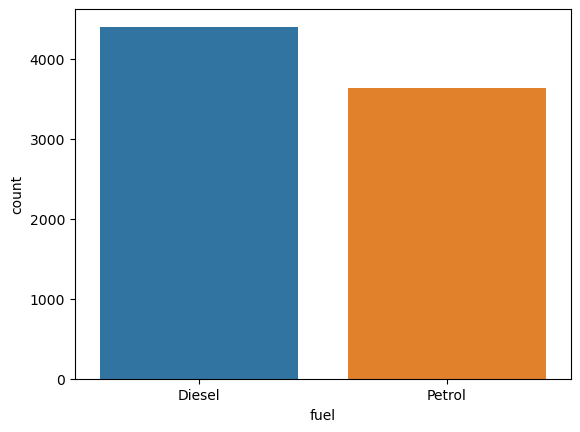

In [30]:
# Create countplot for type of fuel

sns.countplot(data = new_df, x = 'fuel')

According from the graph shows that there are higher number of Diesel car fuel than petrol car.

<AxesSubplot:xlabel='owner', ylabel='count'>

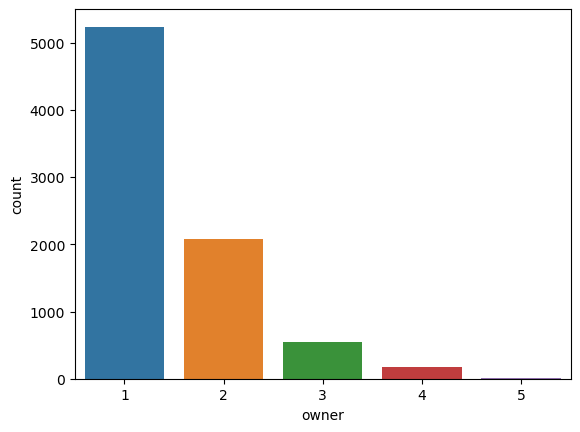

In [31]:
# Create countplot for type of owner

sns.countplot(data = new_df, x = 'owner')

<AxesSubplot:xlabel='seats', ylabel='count'>

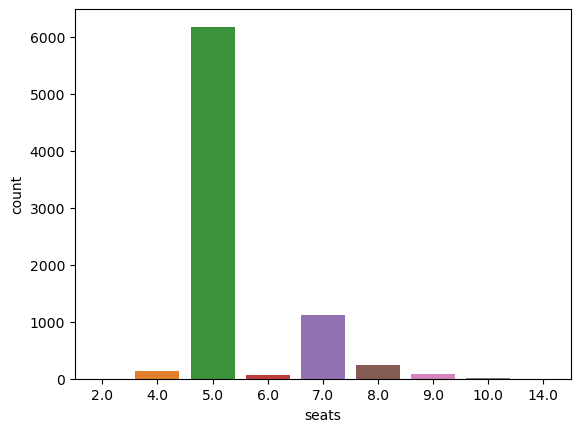

In [32]:
# Create countplot for seats type

sns.countplot(data = new_df, x = 'seats')

<AxesSubplot:xlabel='seller_type', ylabel='count'>

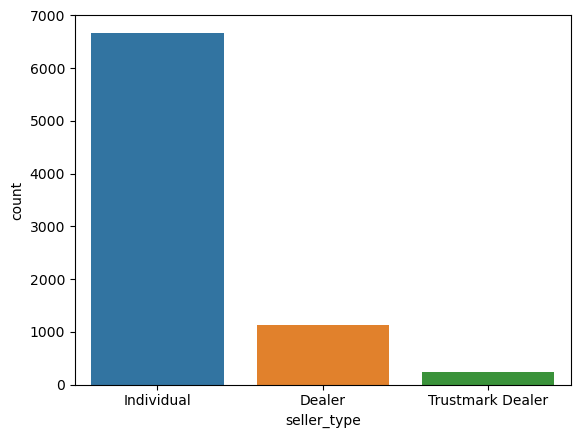

In [33]:
# Create countplot for seller type

sns.countplot(data = new_df, x = 'seller_type')

<AxesSubplot:xlabel='transmission', ylabel='count'>

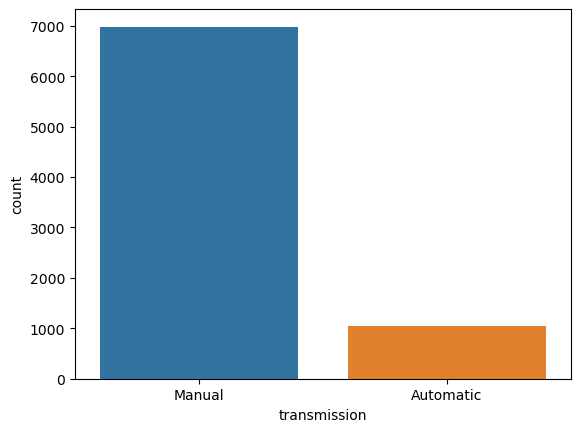

In [34]:
# Create countplot for type of transmission

sns.countplot(data = new_df, x = 'transmission')

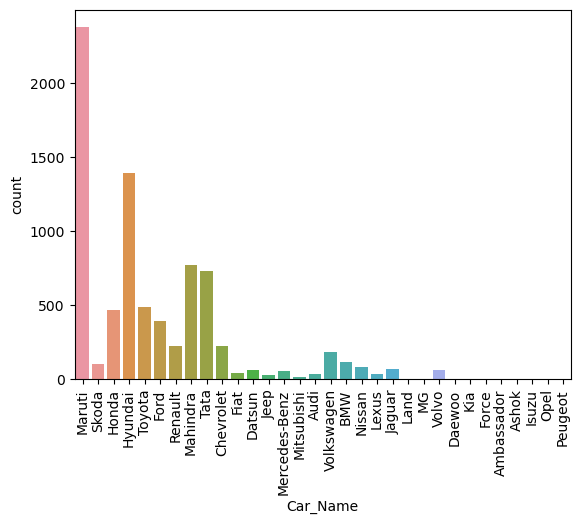

In [35]:
# Create countplot for car brand name

sns.countplot(data = new_df, x = 'Car_Name')
plt.xticks(rotation = 90)
plt.show()

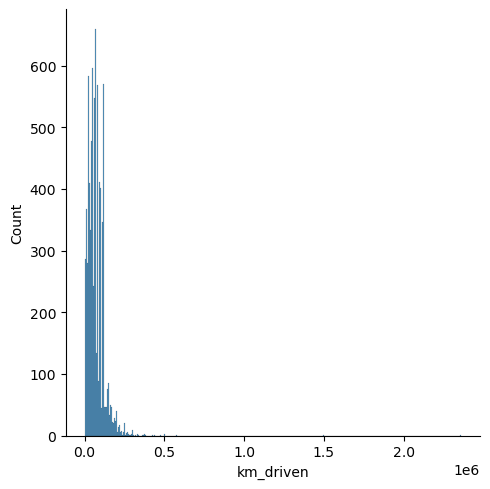

In [36]:
# Distribution plot for for km_driven
sns.displot(x = new_df["km_driven"])

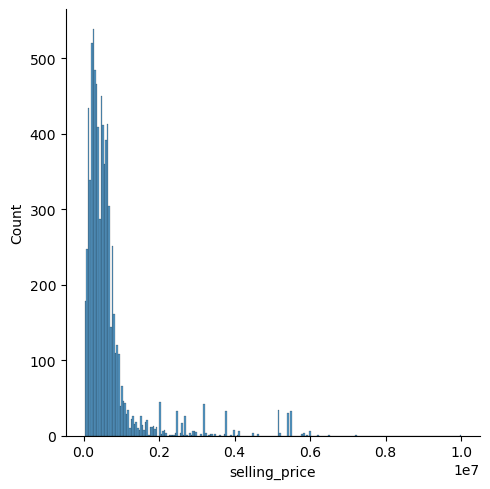

In [37]:
# Distribution plot for for selling price
sns.displot(x = new_df["selling_price"])

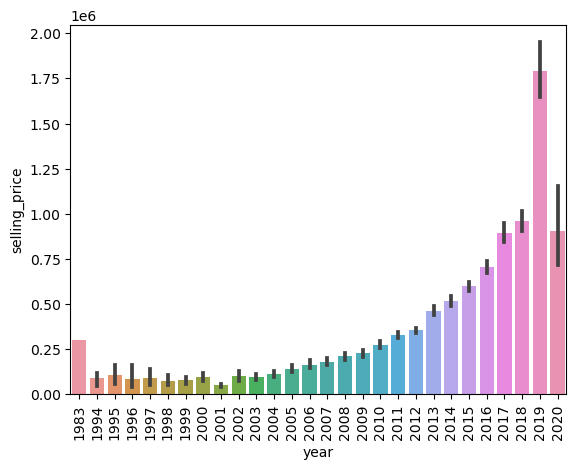

In [38]:
# Bar Chart for seling price in years
sns.barplot(data = new_df, x = "year", y = "selling_price")
plt.xticks(rotation = 90)
plt.show()

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

Text(0.5, 0, 'fuel')

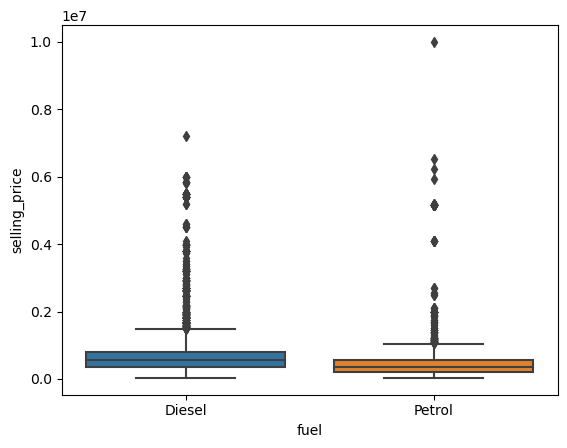

In [39]:
# Create boxplot of selling price of car in each types of fuel
sns.boxplot(x = new_df["fuel"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("fuel")


In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Name         8033 non-null   object 
 1   year             8033 non-null   int64  
 2   selling_price    8033 non-null   int64  
 3   km_driven        8033 non-null   int64  
 4   fuel             8033 non-null   object 
 5   seller_type      8033 non-null   object 
 6   transmission     8033 non-null   object 
 7   owner            8033 non-null   int64  
 8   seats            7819 non-null   float64
 9   Mileage_Value    7819 non-null   float64
 10  Engine_Value     7819 non-null   float64
 11  Max_Power_Value  7825 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.0+ MB


Text(0.5, 0, 'seller_type')

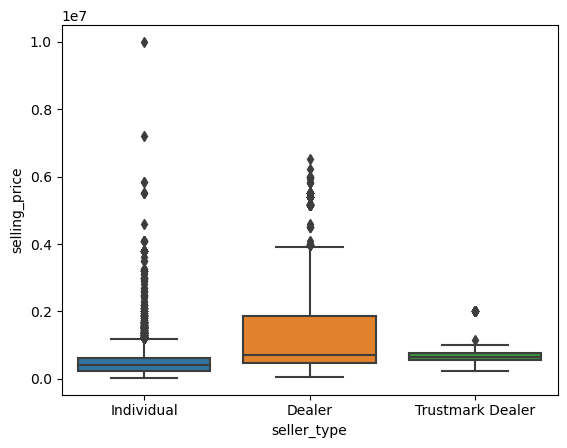

In [41]:
# Create boxplot of selling price of car in each types of seller
sns.boxplot(x = new_df["seller_type"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("seller_type")


Text(0.5, 0, 'transmission')

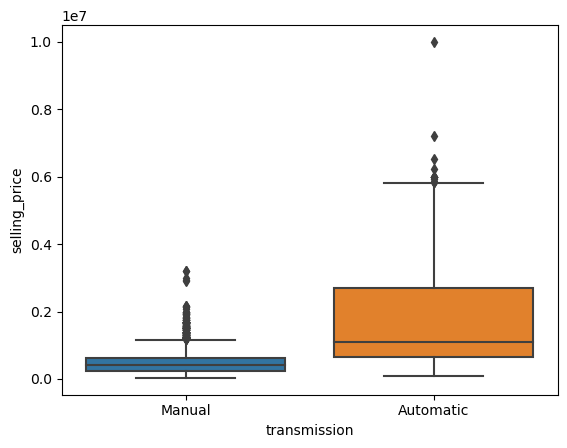

In [42]:
# Create boxplot of selling price of car in each types of transmission
sns.boxplot(x = new_df["transmission"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("transmission")


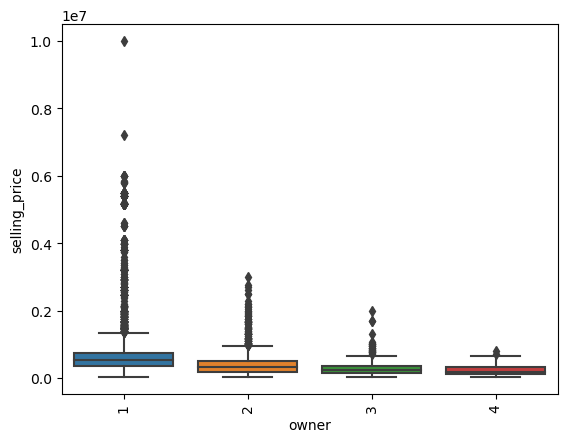

In [43]:
# Create boxplot of selling price of car in each types of owner car
new_df = new_df[new_df["owner"] != 5]
sns.boxplot(x = new_df["owner"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("owner")
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 0, 'seats')

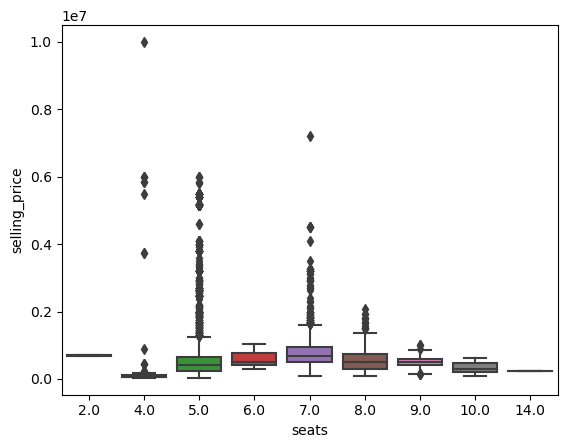

In [44]:
# Create boxplot of selling price of car in each numbers of seats
sns.boxplot(x = new_df["seats"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("seats")

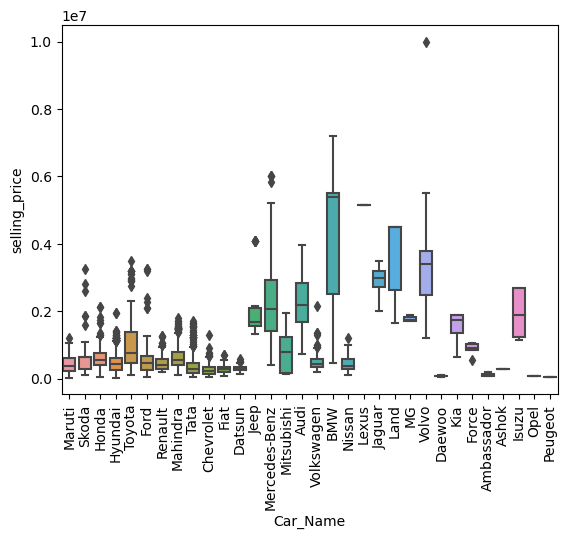

In [45]:
# Create boxplot of selling price of car in each car name
sns.boxplot(x = new_df["Car_Name"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("Car_Name")
plt.xticks(rotation = 90)
plt.show()

In [46]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df["fuel"] = le.fit_transform(new_df["fuel"])
new_df["seller_type"] = le.fit_transform(new_df["seller_type"])
new_df["transmission"] = le.fit_transform(new_df["transmission"])
new_df.head()


,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
0,Maruti,2014,450000,145500,0,1,1,1,5.0,23.40,1248.0,74.00
1,Skoda,2014,370000,120000,0,1,1,2,5.0,21.14,1498.0,103.52
2,Honda,2006,158000,140000,1,1,1,3,5.0,17.70,1497.0,78.00
3,Hyundai,2010,225000,127000,0,1,1,1,5.0,23.00,1396.0,90.00
4,Maruti,2007,130000,120000,1,1,1,1,5.0,16.10,1298.0,88.20


<AxesSubplot:>

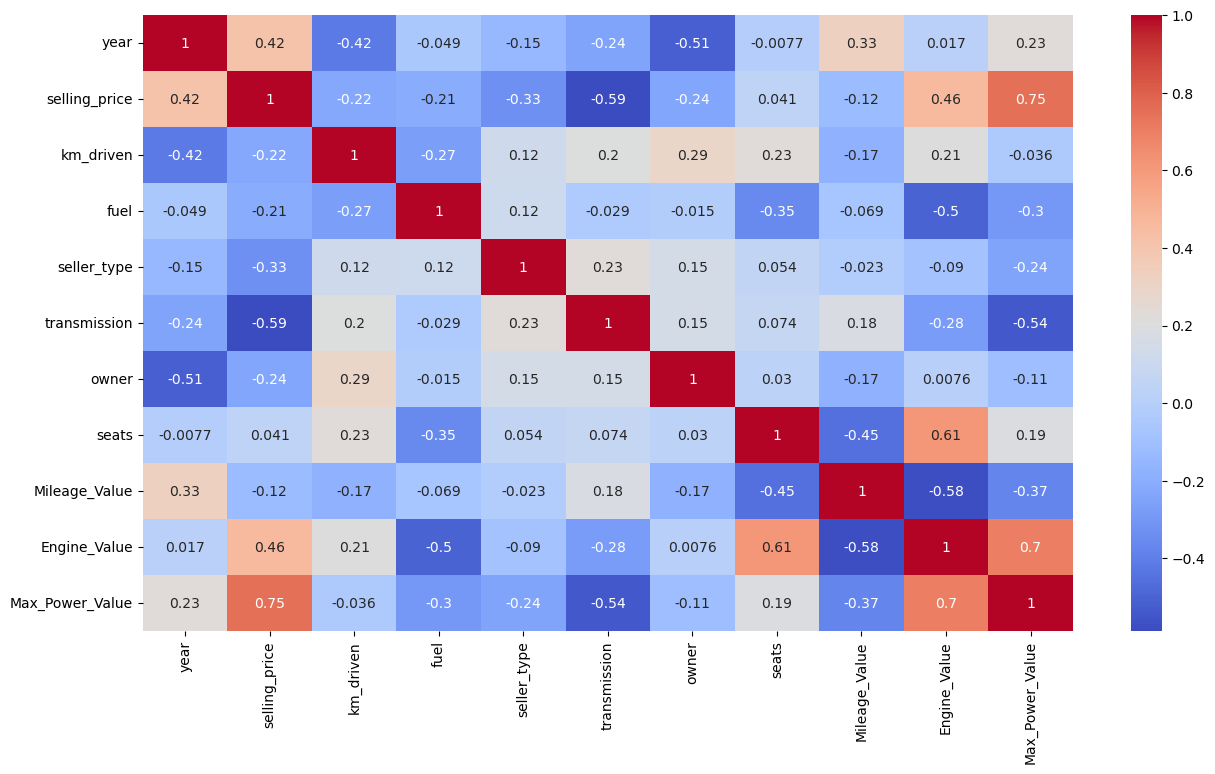

In [47]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

In [48]:
# !pip install ppscore

<AxesSubplot:xlabel='x', ylabel='y'>

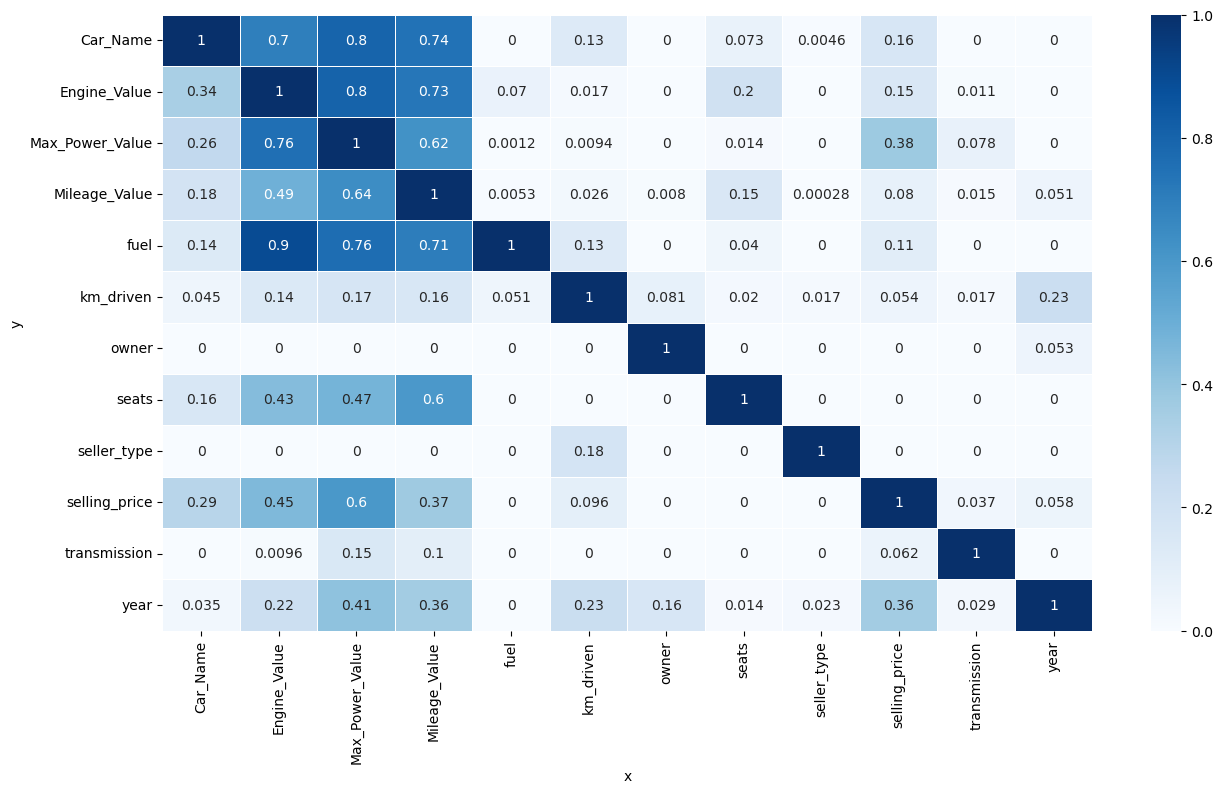

In [49]:
#Use Predictive power score to predict
import ppscore as pps

# before using pps, let's drop car name and year
dfcopy = new_df.copy()
dfcopy.drop(['Car_Name', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(new_df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3 Feature Engineering

From selling_price column is quite hard to see which car has the most expensive and the cheapest which I decide to decending the data in selling_price column.

In [50]:
sorted_new_df = new_df.sort_values(by='selling_price', ascending=False)
sorted_new_df

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
170,Volvo,2017,10000000,30000,1,1,0,1,4.0,42.00,1969.0,400.00
2938,BMW,2020,7200000,5000,0,1,0,1,7.0,13.38,2993.0,265.00
4766,BMW,2018,6000000,27000,0,0,0,1,4.0,17.09,2993.0,261.40
4101,BMW,2018,6000000,28156,0,0,0,1,4.0,17.09,2993.0,261.40
7713,Mercedes-Benz,2017,6000000,37000,0,0,0,1,5.0,13.50,2987.0,254.79
...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Maruti,2004,31504,110000,1,1,1,3,4.0,16.10,796.0,37.00
5965,Maruti,2000,31000,56194,1,1,1,4,4.0,16.10,796.0,37.00
6776,Hyundai,2000,30000,90000,1,1,1,3,NaN,NaN,NaN,NaN
2145,Maruti,2001,30000,10000,1,1,1,1,5.0,17.30,993.0,60.00


<AxesSubplot:>

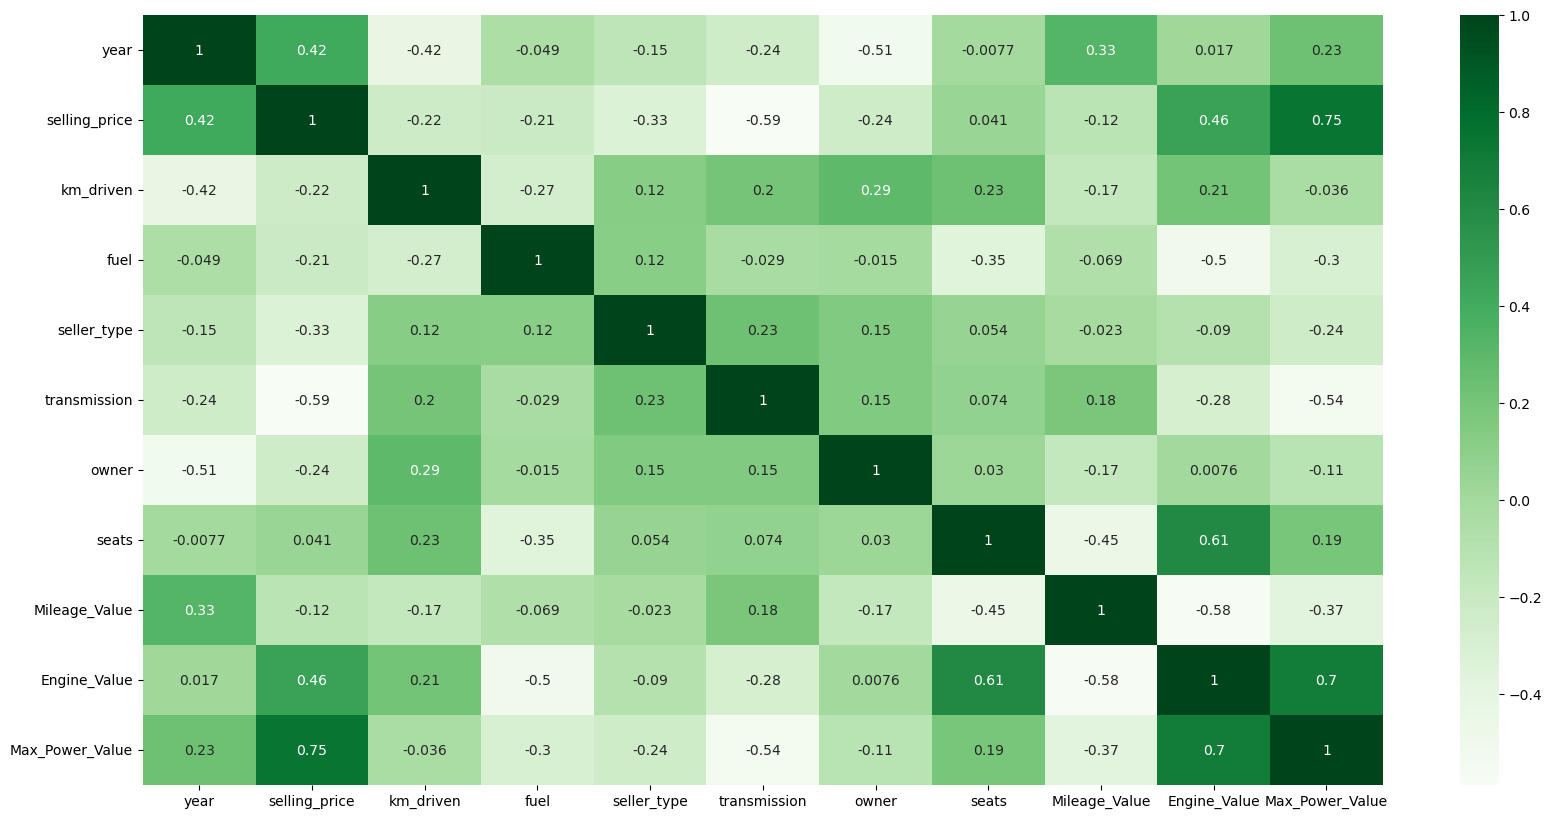

In [51]:
# Heat map
plt.figure(figsize = (20,10))
sns.heatmap(sorted_new_df.corr(), annot = True, cmap = "Greens")

<AxesSubplot:xlabel='x', ylabel='y'>

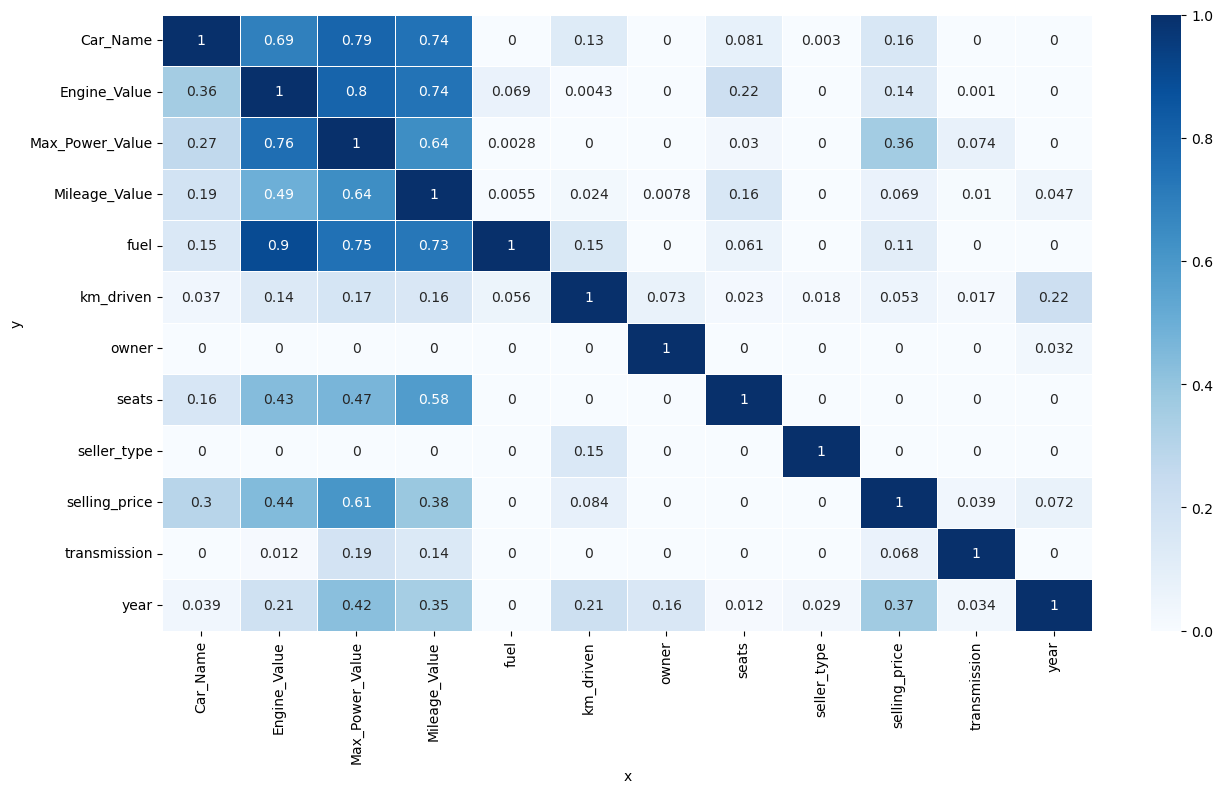

In [52]:
#Actual Prediction
dfcopy = sorted_new_df.copy()
dfcopy.drop(['Car_Name', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(sorted_new_df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 4 Feature Selection

From HeatMap shows that there have correlate between Mileage_Value,km_driven and Max_Power_Value

In [53]:
X = new_df[['km_driven','Max_Power_Value', 'Mileage_Value']]

In [54]:
#Selling Price has high number must use log to transform
y = np.log(new_df['selling_price'])

In [55]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 5. Preprocessing

### Null values

In [56]:
#check for null values
X_train.isna().sum()

km_driven            0
Max_Power_Value    149
Mileage_Value      154
dtype: int64

In [57]:
X_test.isna().sum()

km_driven           0
Max_Power_Value    59
Mileage_Value      60
dtype: int64

In [58]:
y_train.isna().sum()

0

In [59]:
y_test.isna().sum()

0

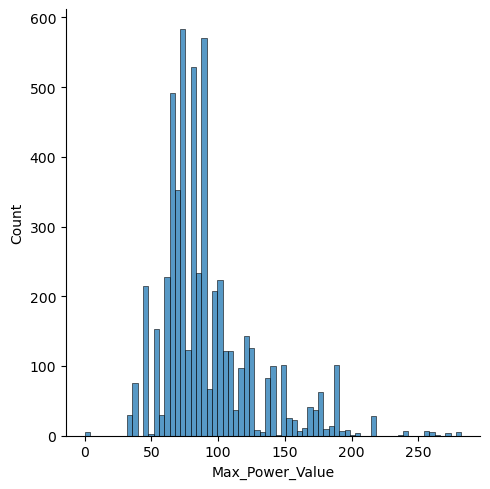

In [60]:
# Check distribution of max_power
sns.displot(data=X_train, x= 'Max_Power_Value')

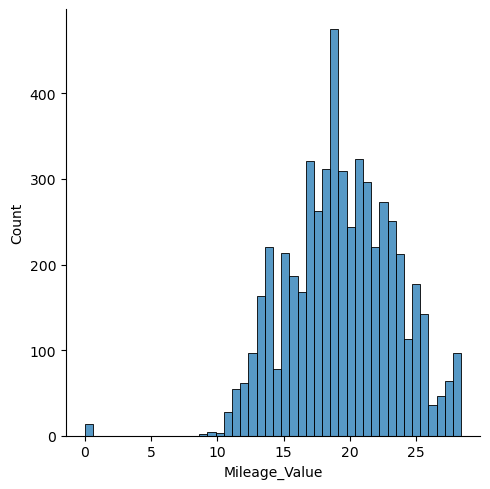

In [61]:
#Check distribution of mileage
sns.displot(data=X_train, x = 'Mileage_Value')

According from Max_Power_Value graph and Mileage_Value graph show that the Mileage_Value graph shape looks like Normal Distribution but the Max_Power_Value is not. To sum up, it can use Means for mileages and Median for Max_Power

In [62]:
X_train['Mileage_Value']

6853    13.58
1495    15.96
7904    20.77
1281    18.80
1421    23.00
        ...  
5293    20.36
5461    20.51
865     20.77
7701    22.37
7366    21.40
Name: Mileage_Value, Length: 5619, dtype: float64

In [63]:
# Fill training set 
X_train['Max_Power_Value'].fillna(X_train['Max_Power_Value'].median(), inplace=True)
X_train['Mileage_Value'].fillna(X_train['Mileage_Value'].mean(), inplace=True)

In [64]:
# Fill testing set 
X_test['Max_Power_Value'].fillna(X_train['Max_Power_Value'].median(), inplace=True)
X_test['Mileage_Value'].fillna(X_train['Mileage_Value'].mean(), inplace=True)

In [65]:
X_train.isnull().sum()

km_driven          0
Max_Power_Value    0
Mileage_Value      0
dtype: int64

In [66]:
X_test.isnull().sum()

km_driven          0
Max_Power_Value    0
Mileage_Value      0
dtype: int64

<AxesSubplot:xlabel='Mileage_Value'>

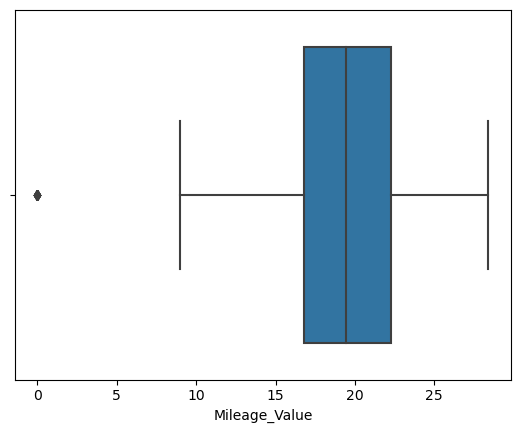

In [67]:
#Checking Outlier
sns.boxplot(data = X_train, x = 'Mileage_Value')

In [68]:
# Check which row in train_set has mileage lower than 5
X_train[X_train['Mileage_Value']<5]

,km_driven,Max_Power_Value,Mileage_Value
6629,80000,70.00,0.0
7337,60000,194.00,0.0
644,28900,65.00,0.0
5900,5000,70.00,0.0
785,90000,62.00,0.0
1649,128000,62.00,0.0
7002,80000,62.10,0.0
5846,28100,103.25,0.0
2137,64788,115.00,0.0
1676,110000,165.00,0.0


<AxesSubplot:xlabel='Max_Power_Value'>

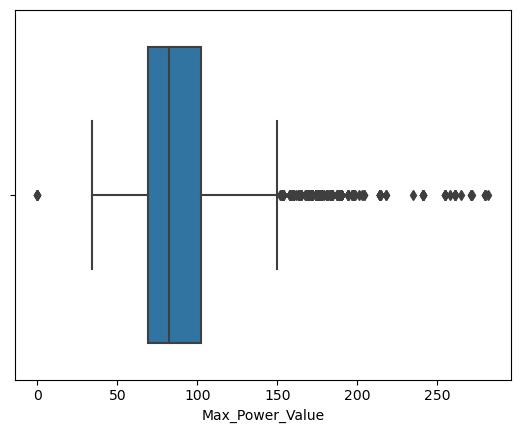

In [69]:
sns.boxplot(data = X_train, x = 'Max_Power_Value')

In [70]:
#Check Shape
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost import XGBRegressor


kfold = KFold(n_splits= 3)
param_grid = {'max_depth': [5, 10, 15], 'learning_rate': [0.01, 0.02, 0.05, 0.1],
              'n_estimators': [200, 300, 400, 500, 600]}

rf = XGBRegressor(random_state = 10)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')


grid.fit(X_train, y_train);

In [72]:
gfjdsgks

NameError: name 'gfjdsgks' is not defined

## 6 Model Selection

In [75]:
#I make two docker containers to easier to run which one for coding and another for mlflow which running on port 50000
import mlflow
import os
import warnings
import sys
import math 
import numpy as np
import pandas as pd

mlflow.set_tracking_uri("./mlruns")
os.environ["LOGNAME"] = "Munthitra"
mlflow.set_experiment(experiment_name="Munthitra-regularization")

MlflowException: Invalid experiment ID: '128503997945312602 - Copy'

In [73]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
column = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.array(y_train)
Y_test = np.array(y_test)

In [78]:
class LinearRegression(object):
    

    kfold = KFold(n_splits= 3)  
    def __init__(self, regularization, initial = 'zeros', momentum = 0 
                ,lr=0.001, method='batch', num_epochs=30, batch_size=200, cv=kfold):
        
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization
        self.momentum   = momentum
        self.initial    = initial

    def mse(self, ytrue, ypred):
        exp_ytrue = np.exp(ytrue)
        exp_ypred = np.exp(ypred)
        return ((ypred - ytrue)** 2).sum()/ ytrue.shape[0]
        
    def r2(self, ytrue, ypred):
        return 1 -(((ypred - ytrue) ** 2).sum() / ((ypred - ytrue.mean()) ** 2).sum())
    def fit(self, X_train, y_train):
        self.kfold_scores = list()

        self.val_loss_old = np.infty

        self.prev_step = np.zeros(X_train.shape[1])

        if self.initial == 'xavier':
            m = X_train.shape[0]
            lower , upper = -(1.0 / math.sqrt(m)), (1.0 / math.sqrt(m))
            numbers = np.random.uniform(lower, upper, size = X_train.shape[1])
            scaled = lower + numbers * (upper - lower)
            self.theta = scaled
        
        else:
            self.theta = np.zeros(X_train.shape[1])

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):

                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1,-1)
                            y_method_train = np.array([y_cross_train[batch_idx]])
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    mlflow.log_input(mlflow_train_data, context="training")
                    
                    mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    mlflow.log_input(mlflow_val_data, context="validation")
                    

                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
                
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        step = self.lr * grad
        self.theta = self.theta - step + self.momentum * self.prev_step
        self.prev_step = step
        return self.mse(y, yhat)

    def predict(self, X):
        return X @ self.theta 
    
    def _coef(self):
        return self.theta[1:]  
    def _bias(self):
        return self.theta[0]

    
    def feature_importance(self, column):
        coefs = pd.DataFrame(self._coef(), index = column)
        coefs.plot(kind="barh", figsize=(9, 7))
        plt.title("Model simulation")
        plt.axvline(x=0, color=".5")
        plt.subplots_adjust(left=0.3)
        plt.show()

In [79]:
class Normal:

    def __call__(self, theta): #__call__ allows us to call class as method
        return np.zeros(theta.shape[0])

    def derivation(self, theta):
        return np.zeros(theta.shape[0])

class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class Norm(LinearRegression):
    
    def __init__(self, initial, method, momentum, lr, l):
        self.regularization = Normal()
        super().__init__(self.regularization, initial, momentum, lr, method)
    
class Lasso(LinearRegression):
    
    def __init__(self, initial, method, momentum, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, initial, momentum, lr, method)
        
class Ridge(LinearRegression):
    
    def __init__(self, initial, method, momentum, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, initial, momentum, lr, method)

In [80]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [ ]:
# method-batch-momentum-0-lr-0.01-l-0.1-initial-zeros-reg-Poly

In [ ]:
regs = ["Poly", "Lasso", "Norm", "Ridge"]
momentums = [0, 0.5]
initial = ["zeros", "xavier"]
method = ["batch", "sto", "mini"]
learning_rate = [0.01, 0.001, 0.0001]


for reg in regs:
    for m in momentums:
        for i in initial:
            for med in method:
                for lr in learning_rate:                
                        params = {"method": "batch", "momentum": m, "lr": lr, "l": 0.1, "initial":i}
                        mlflow.start_run(run_name=f"method-{params['method']}-momentum-{params['momentum']}-lr-{params['lr']}-l-{params['l']}-initial-{params['initial']}-reg-{reg}", nested=True)
                        print("="*5, m, reg, "="*5)
                        
                        if reg == "Poly":
                            X_train_copy = PolynomialFeatures(degree = 2, include_bias=True).fit_transform(X_train)
                            X_test_copy = PolynomialFeatures(degree = 2, include_bias=True).fit_transform(X_test)

                            type_of_regression = str_to_class("Norm")   
                            model = type_of_regression(**params)  
                            model.fit(X_train_copy, y_train)
                            yhat = model.predict(X_test_copy)
                            mse  = model.mse(yhat, y_test)
                            r2 = model.r2(yhat, y_test)

                        else:
                            X_train_copy = PolynomialFeatures(degree = 1, include_bias=True).fit_transform(X_train)
                            X_test_copy = PolynomialFeatures(degree = 1, include_bias=True).fit_transform(X_test)

                            type_of_regression = str_to_class(reg)    #"Poly", "Lasso", "Norm", "Ridge"
                            model = type_of_regression(**params)  
                            model.fit(X_train_copy, y_train)
                            yhat = model.predict(X_test_copy)
                            mse  = model.mse(yhat, y_test)
                            r2 = model.r2(yhat, y_test)

                        print("Test MSE: ", mse)
                        mlflow.log_metric(key="test_mse", value=mse)
                        print("Test r2: ", r2)
                        mlflow.log_metric(key="test_r2", value=r2)

                        signature = mlflow.models.infer_signature(X_train_copy, model.predict(X_train_copy))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        mlflow.end_run()

===== 0 Poly =====
Fold 0: 6.964653394160969e+41
Fold 1: 3.26688320458695e+83
Fold 2: 5.938296991447175e+79
Test MSE:  5.062619821904506e+78
Test r2:  -89.64592808415858
===== 0 Poly =====
Fold 0: 141.21057553294395
Fold 1: 121.58372171080849
Fold 2: 114.30019983498833
Test MSE:  108.90029697368468
Test r2:  -0.07168544638375463
===== 0 Poly =====
Fold 0: 166.04953004241418
Fold 1: 162.03073914082393
Fold 2: 160.07490864231212
Test MSE:  158.7929050578176
Test r2:  0.000666018788865963
===== 0 Poly =====
Fold 0: 6.964653394160999e+41
Fold 1: 3.2668832045869574e+83
Fold 2: 5.938296991447196e+79
Test MSE:  5.062619821904518e+78
Test r2:  -89.6459280841586
===== 0 Poly =====
Fold 0: 141.21057553294395
Fold 1: 121.58372171080849
Fold 2: 114.30019983498832
Test MSE:  108.90029697368468
Test r2:  -0.07168544638375463
===== 0 Poly =====
Fold 0: 166.04953004241418
Fold 1: 162.03073914082393
Fold 2: 160.07490864231212
Test MSE:  158.7929050578176
Test r2:  0.000666018788865963
===== 0 Poly ====

## 7 Testing

Test MSE:  0.25978338879148205
Test r2:  0.6307749892425716


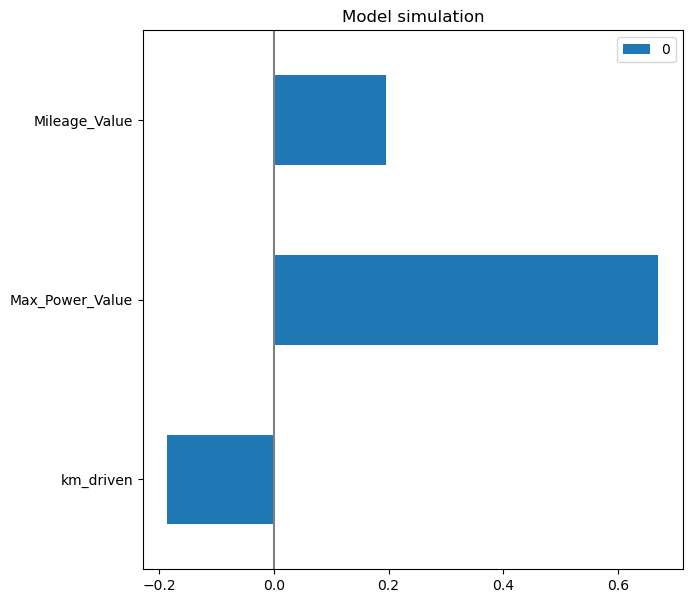

None

In [99]:
import pickle
filename = r'C:\Users\Munthitra\Desktop\Chaklam\a2\mlruns\128503997945312602\50b53fb75b944074a4035a5093cda763\artifacts\model\model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

X_train_copy = PolynomialFeatures(degree = 1, include_bias=True).fit_transform(X_train)
X_test_copy = PolynomialFeatures(degree = 1, include_bias=True).fit_transform(X_test)

yhat = loaded_model.predict(X_test_copy)
mse  = loaded_model.mse(yhat, y_test)
r2 =  loaded_model.r2(yhat, y_test)
print("Test MSE: ", mse)
print("Test r2: ", r2)

display(loaded_model.feature_importance(column))


# 8. Inference 

In [100]:
new_df[["Max_Power_Value","Mileage_Value","km_driven","selling_price"]].loc[15]

Max_Power_Value        82.00
Mileage_Value          18.15
km_driven           40000.00
selling_price      400000.00
Name: 15, dtype: float64

In [101]:
# Check if model could be applied.
sample = np.array([[40000,82.00, 18.15]])
sample = scaler.transform(sample)
sample = PolynomialFeatures(degree = 1, include_bias=True).fit_transform(sample)
predicted_life_exp = loaded_model.predict(sample)
print(np.exp(predicted_life_exp))

[371925.51079343]


## Summary

To sum up, according from the experiments of cross-validation to compare (1) polynomial, lasso, ridge, normal; (2) with or without momentum;
(3) stochastic, mini-batch, batch; (4) zero, xavier; (5) learning rate of 0.01, 0.001, and 0.0001 found that the best method contain normal distribution with 0.5 momentum, mini-batch, Xavial and learning rate at 0.01 which can be see in low mse and high r^2 which from the model got 0.26 for mse value and r^2 for 0.631.

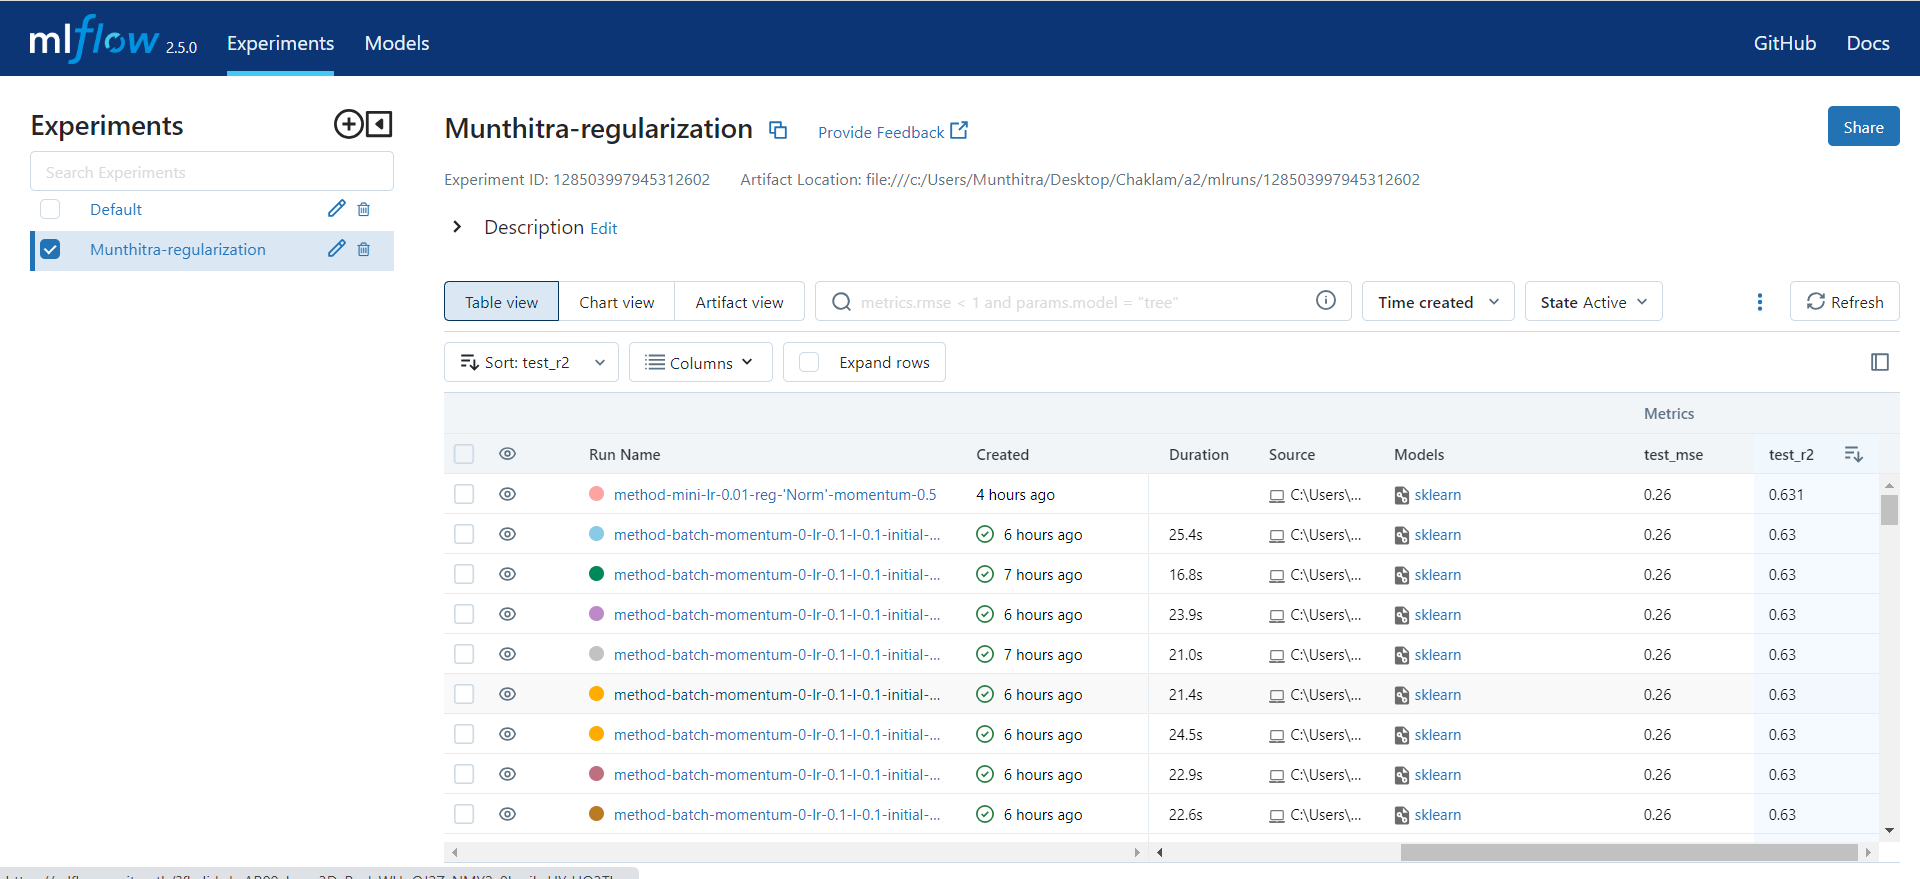

![Screenshot 2023-09-11 165158.png](<attachment:Screenshot 2023-09-11 165158.png>)
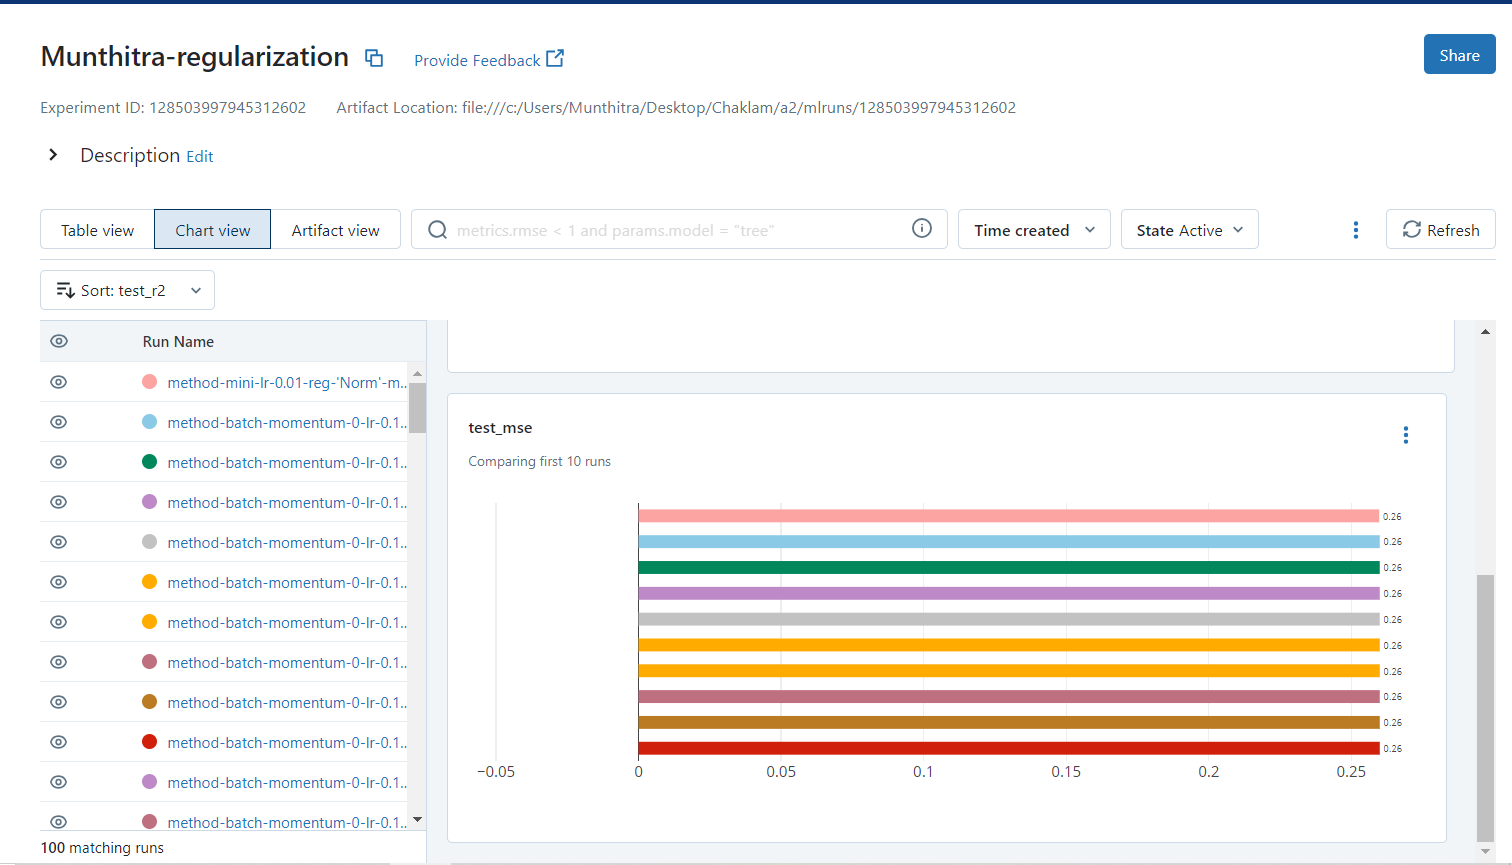

In [ ]:
from mlflow import MlflowClient


In [ ]:
from mlflow.entities import ViewType

run = MlflowClient(tracking_uri='http://localhost:5000').search_runs(
    experiment_ids="128503997945312602",
    filter_string="",
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=1,
    order_by=["metrics.accuracy DESC"],
)

MlflowException: API request to http://localhost:5000/api/2.0/mlflow/runs/search failed with exception HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /api/2.0/mlflow/runs/search (Caused by ReadTimeoutError("HTTPConnectionPool(host='localhost', port=5000): Read timed out. (read timeout=120)"))

In [ ]:
run